# Demo 8 - Deep Learning - Transfer Learning e utilização da VGG-16

### Demo - Implementação de um classificador de gatos e cachorros utilizando VGG-16 (Transfer Learning) - https://neurohive.io/en/popular-networks/vgg16/

### Cybersecurity MBA - Inteligência Artificial e Machine Learning


## Baixando dados de gatos e cachorros para treinamento de nossa rede

In [1]:
!wget --no-check-certificate \
  https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip \
  -O cats_and_dogs_filtered.zip

--2025-03-11 21:39:19--  https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 172.217.218.207, 142.251.31.207, 142.251.18.207, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|172.217.218.207|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 68606236 (65M) [application/zip]
Saving to: ‘cats_and_dogs_filtered.zip’

cats_and_dogs_filte 100%[===================>]  65.43M  30.2MB/s    in 2.2s    

2025-03-11 21:39:21 (30.2 MB/s) - ‘cats_and_dogs_filtered.zip’ saved [68606236/68606236]



## Unzip da pasta baixada anteriormente

In [2]:

! unzip cats_and_dogs_filtered.zip

Archive:  cats_and_dogs_filtered.zip
   creating: cats_and_dogs_filtered/
  inflating: cats_and_dogs_filtered/vectorize.py  
   creating: cats_and_dogs_filtered/validation/
   creating: cats_and_dogs_filtered/train/
   creating: cats_and_dogs_filtered/validation/dogs/
  inflating: cats_and_dogs_filtered/validation/dogs/dog.2127.jpg  
  inflating: cats_and_dogs_filtered/validation/dogs/dog.2126.jpg  
  inflating: cats_and_dogs_filtered/validation/dogs/dog.2125.jpg  
  inflating: cats_and_dogs_filtered/validation/dogs/dog.2124.jpg  
  inflating: cats_and_dogs_filtered/validation/dogs/dog.2123.jpg  
  inflating: cats_and_dogs_filtered/validation/dogs/dog.2122.jpg  
  inflating: cats_and_dogs_filtered/validation/dogs/dog.2121.jpg  
  inflating: cats_and_dogs_filtered/validation/dogs/dog.2120.jpg  
  inflating: cats_and_dogs_filtered/validation/dogs/dog.2119.jpg  
  inflating: cats_and_dogs_filtered/validation/dogs/dog.2118.jpg  
  inflating: cats_and_dogs_filtered/validation/dogs/dog.2117.

## Imports Necessários

In [3]:
import tensorflow as tf
from tensorflow.keras.applications.vgg16 import preprocess_input

# Definir os diretórios de treino e validação
train_dir = "cats_and_dogs_filtered/train"
val_dir = "cats_and_dogs_filtered/validation"

# Criar os datasets de treino e validação
batch_size = 32
img_size = (224, 224)

train_dataset = tf.keras.utils.image_dataset_from_directory(
    train_dir,
    image_size=img_size,
    batch_size=batch_size
)

val_dataset = tf.keras.utils.image_dataset_from_directory(
    val_dir,
    image_size=img_size,
    batch_size=batch_size
)

# Aplicar pré-processamento do VGG16
train_dataset = train_dataset.map(lambda x, y: (preprocess_input(x), y))
val_dataset = val_dataset.map(lambda x, y: (preprocess_input(x), y))

# Melhorar a performance
AUTOTUNE = tf.data.AUTOTUNE
train_dataset = train_dataset.prefetch(buffer_size=AUTOTUNE)
val_dataset = val_dataset.prefetch(buffer_size=AUTOTUNE)


Found 2000 files belonging to 2 classes.
Found 1000 files belonging to 2 classes.


## Verificação de imagens/classes

In [4]:

# Definir os diretórios de treino e validação
train_dir = "cats_and_dogs_filtered/train"
val_dir = "cats_and_dogs_filtered/validation"

# Criar os datasets de treino e validação
batch_size = 32
img_size = (224, 224)

train_dataset = tf.keras.utils.image_dataset_from_directory(
    train_dir,
    image_size=img_size,
    batch_size=batch_size
)

val_dataset = tf.keras.utils.image_dataset_from_directory(
    val_dir,
    image_size=img_size,
    batch_size=batch_size
)

# Aplicar pré-processamento do VGG16
train_dataset = train_dataset.map(lambda x, y: (preprocess_input(x), tf.one_hot(y, depth=2)))
val_dataset = val_dataset.map(lambda x, y: (preprocess_input(x), tf.one_hot(y, depth=2)))

# Melhorar a performance
AUTOTUNE = tf.data.AUTOTUNE
train_dataset = train_dataset.prefetch(buffer_size=AUTOTUNE)
val_dataset = val_dataset.prefetch(buffer_size=AUTOTUNE)


Found 2000 files belonging to 2 classes.
Found 1000 files belonging to 2 classes.


## Construção de nossa arquitetura (vide doc. exemplo)

#### Artigo original: https://arxiv.org/abs/1409.1556

In [5]:
import keras
from keras.models import Sequential
from keras.layers import Dense, Conv2D, MaxPool2D , Flatten
import numpy as np

model = Sequential()
model.add(Conv2D(input_shape=(224,224,3),filters=64,kernel_size=(3,3),padding="same", activation="relu"))
model.add(Conv2D(filters=64,kernel_size=(3,3),padding="same", activation="relu"))
model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))
model.add(Conv2D(filters=128, kernel_size=(3,3), padding="same", activation="relu"))
model.add(Conv2D(filters=128, kernel_size=(3,3), padding="same", activation="relu"))
model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))
model.add(Conv2D(filters=256, kernel_size=(3,3), padding="same", activation="relu"))
model.add(Conv2D(filters=256, kernel_size=(3,3), padding="same", activation="relu"))
model.add(Conv2D(filters=256, kernel_size=(3,3), padding="same", activation="relu"))
model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))
model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))
model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))
model.add(Flatten())
model.add(Dense(units=4096,activation="relu"))
model.add(Dense(units=4096,activation="relu"))
model.add(Dense(units=2, activation="softmax"))

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [6]:
from tensorflow.keras.optimizers import Adam
opt = Adam(learning_rate=0.001)
model.compile(optimizer=opt, loss=keras.losses.categorical_crossentropy, metrics=['accuracy'])

In [7]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 224, 224, 64)        │           1,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 224, 224, 64)        │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 112, 112, 64)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 112, 112, 128)       │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 112, 112, 128)       │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 56, 56, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_4 (Conv2D)                    │ (None, 56, 56, 256)         │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_5 (Conv2D)                    │ (None, 56, 56, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_6 (Conv2D)                    │ (None, 56, 56, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 28, 28, 256)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_7 (Conv2D)                    │ (None, 28, 28, 512)         │       1,180,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_8 (Conv2D)                    │ (None, 28, 28, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_9 (Conv2D)                    │ (None, 28, 28, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 14, 14, 512)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_10 (Conv2D)                   │ (None, 14, 14, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_11 (Conv2D)                   │ (None, 14, 14, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_12 (Conv2D)                   │ (None, 14, 14, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_4 (MaxPooling2D)       │ (None, 7, 7, 512)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 25088)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 4096)                │     102,764,544 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 4096)                │      16,781,312 │
├──────────────────────────────────────┼─────────────────────────────┼──────────────

 Total params: 134,268,738 (512.19 MB)

 Trainable params: 134,268,738 (512.19 MB)

 Non-trainable params: 0 (0.00 B)

# Salvando o modelo criado para uso posterior (tarefa de classificação de imagens)

In [8]:
from keras.callbacks import ModelCheckpoint

checkpoint = ModelCheckpoint("vgg16_1.h5", monitor='val_accuracy', verbose=1, save_best_only=False, save_weights_only=False, mode='auto', save_freq=100)
#early = EarlyStopping(monitor='val_accuracy', min_delta=0, patience=20, verbose=1, mode='auto')


# Treinamento

In [9]:
hist = model.fit(
    train_dataset,
    validation_data=val_dataset,
    epochs=50,
    steps_per_epoch=10,
    validation_steps=10,
    callbacks=[checkpoint]
)

Epoch 1/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 55s 2s/step - accuracy: 0.4561 - loss: 2250.7688 - val_accuracy: 0.5125 - val_loss: 0.6934
Epoch 2/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 11s 1s/step - accuracy: 0.5035 - loss: 0.7699 - val_accuracy: 0.4781 - val_loss: 0.6946
Epoch 3/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 10s 1s/step - accuracy: 0.4643 - loss: 0.6950 - val_accuracy: 0.5437 - val_loss: 0.6903
Epoch 4/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 6s 644ms/step - accuracy: 0.5393 - loss: 0.7058 - val_accuracy: 0.5219 - val_loss: 0.6926
Epoch 5/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 6s 651ms/step - accuracy: 0.5210 - loss: 0.6936 - val_accuracy: 0.4750 - val_loss: 0.6957
Epoch 6/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 6s 652ms/step - accuracy: 0.4654 - loss: 0.6953 - val_accuracy: 0.5312 - val_loss: 0.6929
Epoch 7/50
 3/10 ━━━━━━━━━━━━━━━━━━━━ 1:18 11s/step - accuracy: 0.5083 - loss: 0.6927

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/epoch_iterator.py:107: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self._interrupted_warning()


10/10 ━━━━━━━━━━━━━━━━━━━━ 25s 3s/step - accuracy: 0.5200 - loss: 0.6924 - val_accuracy: 0.5437 - val_loss: 0.6891
Epoch 8/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 34s 653ms/step - accuracy: 0.5005 - loss: 0.7341 - val_accuracy: 0.5281 - val_loss: 0.6917
Epoch 9/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 10s 1s/step - accuracy: 0.4241 - loss: 0.6983 - val_accuracy: 0.5594 - val_loss: 0.8029
Epoch 10/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 10s 1s/step - accuracy: 0.5174 - loss: 0.7426 - val_accuracy: 0.5219 - val_loss: 0.6929
Epoch 11/50
 6/10 ━━━━━━━━━━━━━━━━━━━━ 1s 468ms/step - accuracy: 0.4851 - loss: 0.6934
Epoch 11: saving model to vgg16_1.h5


10/10 ━━━━━━━━━━━━━━━━━━━━ 26s 3s/step - accuracy: 0.4864 - loss: 0.6939 - val_accuracy: 0.5031 - val_loss: 0.6932
Epoch 12/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 10s 1s/step - accuracy: 0.5367 - loss: 0.6938 - val_accuracy: 0.5063 - val_loss: 0.6930
Epoch 13/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 10s 1s/step - accuracy: 0.4552 - loss: 0.6939 - val_accuracy: 0.5156 - val_loss: 0.6940
Epoch 14/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 3s 275ms/step - accuracy: 0.5231 - loss: 0.6925 - val_accuracy: 0.4906 - val_loss: 0.7052
Epoch 15/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 7s 688ms/step - accuracy: 0.4357 - loss: 0.7062 - val_accuracy: 0.5125 - val_loss: 0.6930
Epoch 16/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 10s 1s/step - accuracy: 0.4703 - loss: 0.6936 - val_accuracy: 0.4563 - val_loss: 0.6946
Epoch 17/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 10s 1s/step - accuracy: 0.4542 - loss: 0.6944 - val_accuracy: 0.4781 - val_loss: 0.6932
Epoch 18/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 6s 651ms/step - accuracy: 0.5161 - loss: 0.6931 - val_accuracy: 0.5031 - val_los

10/10 ━━━━━━━━━━━━━━━━━━━━ 16s 660ms/step - accuracy: 0.4151 - loss: 0.6934 - val_accuracy: 0.4719 - val_loss: 0.6932
Epoch 24/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 6s 655ms/step - accuracy: 0.4784 - loss: 0.6932 - val_accuracy: 0.4750 - val_loss: 0.6932
Epoch 25/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 11s 1s/step - accuracy: 0.5234 - loss: 0.6931 - val_accuracy: 0.4875 - val_loss: 0.6932
Epoch 26/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 10s 1s/step - accuracy: 0.5444 - loss: 0.6930 - val_accuracy: 0.4938 - val_loss: 0.6932
Epoch 27/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 10s 1s/step - accuracy: 0.5012 - loss: 0.6932 - val_accuracy: 0.5188 - val_loss: 0.6930
Epoch 28/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 5s 529ms/step - accuracy: 0.4900 - loss: 0.6933 - val_accuracy: 0.5094 - val_loss: 0.6931
Epoch 29/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 10s 1s/step - accuracy: 0.4533 - loss: 0.6937 - val_accuracy: 0.4875 - val_loss: 0.6932
Epoch 30/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 6s 658ms/step - accuracy: 0.4790 - loss: 0.6932 - val_accuracy: 0.5125 - val_

10/10 ━━━━━━━━━━━━━━━━━━━━ 41s 4s/step - accuracy: 0.4572 - loss: 0.6933 - val_accuracy: 0.5063 - val_loss: 0.6931
Epoch 34/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 6s 649ms/step - accuracy: 0.5218 - loss: 0.6931 - val_accuracy: 0.5406 - val_loss: 0.6931
Epoch 35/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 5s 525ms/step - accuracy: 0.4691 - loss: 0.6932 - val_accuracy: 0.5125 - val_loss: 0.6931
Epoch 36/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 10s 1s/step - accuracy: 0.4612 - loss: 0.6934 - val_accuracy: 0.5281 - val_loss: 0.6930
Epoch 37/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 10s 1s/step - accuracy: 0.5185 - loss: 0.6931 - val_accuracy: 0.4594 - val_loss: 0.6932
Epoch 38/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 6s 665ms/step - accuracy: 0.4513 - loss: 0.6932 - val_accuracy: 0.5156 - val_loss: 0.6931
Epoch 39/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 7s 673ms/step - accuracy: 0.5411 - loss: 0.6931 - val_accuracy: 0.4938 - val_loss: 0.6932
Epoch 40/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 6s 656ms/step - accuracy: 0.5513 - loss: 0.6928 - val_accuracy: 0.5156 - val

10/10 ━━━━━━━━━━━━━━━━━━━━ 41s 5s/step - accuracy: 0.5042 - loss: 0.6932 - val_accuracy: 0.5031 - val_loss: 0.6931
Epoch 46/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 6s 665ms/step - accuracy: 0.5098 - loss: 0.6931 - val_accuracy: 0.4719 - val_loss: 0.6933
Epoch 47/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 10s 1s/step - accuracy: 0.4510 - loss: 0.6935 - val_accuracy: 0.4969 - val_loss: 0.6932
Epoch 48/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 10s 1s/step - accuracy: 0.4564 - loss: 0.6935 - val_accuracy: 0.5250 - val_loss: 0.6931
Epoch 49/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 3s 271ms/step - accuracy: 0.5634 - loss: 0.6931 - val_accuracy: 0.5156 - val_loss: 0.6931
Epoch 50/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 6s 653ms/step - accuracy: 0.4871 - loss: 0.6933 - val_accuracy: 0.4906 - val_loss: 0.6932


# Import de imagens para teste

In [11]:
from google.colab import files

uploaded = files.upload()

for fn in uploaded.keys():
  print('Arquivo de nome "{name}" de tamanho {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))

Saving sphinx-cat.jpg to sphinx-cat.jpg
Arquivo de nome "sphinx-cat.jpg" de tamanho 66400 bytes


# Classificação (ex: cães e gatos)

1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
cat


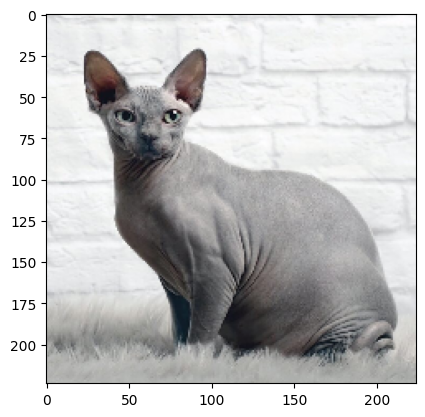

In [12]:
import keras.utils as image
from keras.models import load_model
import matplotlib.pyplot as plt

img = image.load_img("sphinx-cat.jpg",target_size=(224,224))
img = np.asarray(img)
plt.imshow(img)
img = np.expand_dims(img, axis=0)

saved_model = load_model("vgg16_1.h5")
output = saved_model.predict(img)
if output[0][0] > output[0][1]:
    print("cat")
else:
    print('dog')